# **Week 3: Data Analysis in Astronomy**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import linregress

# **Curve Fitting - Blackbody Radiation** [need data!]

The radiation emitted by a perfect blackbody is given by Planck’s Law, which describes the spectral radiance B(λ,T):

\begin{align}
B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda kT}} - 1}
\end{align}

where:

* h = Planck’s constant (6.626×10$^{−34}$ J·s)
* c = Speed of light (3.0×10$^{8}$ m/s)
* k = Boltzmann constant (1.381×10$^{−23}$ J/K)
* λ = Wavelength (m)
* T = Temperature (K)

**Explanation of Code:**

* **Generating a Blackbody Spectrum:** We use `planck_law()` to compute intensity for a given temperature `T=5000K`.
* **Plotting the Spectrum:** The curve shows the spectral radiance versus wavelength.

\\
The peak of the blackbody spectrum shifts to shorter wavelengths as temperature increases (**Wien’s Law**).


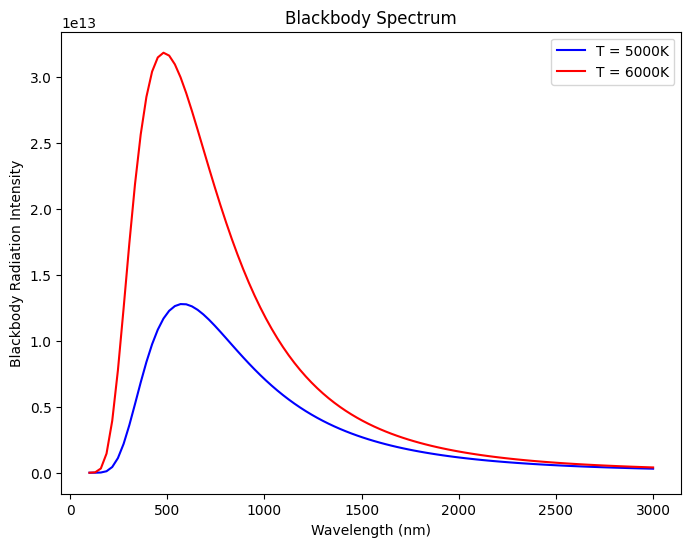

In [12]:
# Example 2: Curve Fitting - Blackbody Radiation
# ----------------------------------------------
def planck_law(wavelength, T):
    h = 6.626e-34  # Planck's constant (J s)
    c = 3.0e8  # Speed of light (m/s)
    k = 1.381e-23  # Boltzmann constant (J/K)
    return (2*h*c**2 / wavelength**5) / (np.exp(h*c / (wavelength*k*T)) - 1)

# Generate synthetic spectrum for a star with T = 5000K
wavelengths = np.linspace(1e-7, 3e-6, 100)  # Wavelengths in meters
intensities_example1 = planck_law(wavelengths, 5000)
intensities_example2 = planck_law(wavelengths, 6000)

plt.figure(figsize=(8,6))
plt.plot(wavelengths * 1e9, intensities_example1, label='T = 5000K', color='blue')
plt.plot(wavelengths * 1e9, intensities_example2, label='T = 6000K', color='red')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Blackbody Radiation Intensity")
plt.title("Blackbody Spectrum")
plt.legend()
plt.show()

# **Linear Regression - Distance Modulus Relation**

Linear regression is used to determine the relationship between two variables by fitting a straight line to the data.

In astronomy, we use the distance modulus equation to relate the apparent magnitude (m) and absolute magnitude (M) of a star to its distance (d) in parsecs:

\begin{align}
m - M = 5 \log_{10}(d) - 5
\end{align}

Rearranging for distance:

\begin{align}
d = 10^{\frac{m - M + 5}{5}}
\end{align}

\\

**Explanation of Code:**

* **Synthetic Data:** We generate arrays of absolute and apparent magnitudes.
* **Distance Calculation:** We use the distance modulus equation.
* **Linear Regression:** The `scipy.stats.linregress()` function finds the best-fit line.
* **Plot:** The best-fit line is compared against data points.


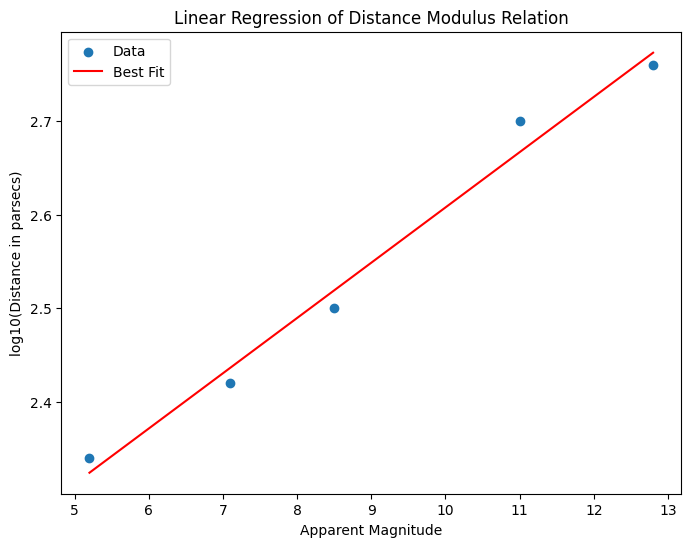

In [2]:
# Example 1: Linear Regression - Distance Modulus Relation
# ---------------------------------------------------------
def distance_modulus(m, M):
    return 10 ** ((m - M + 5) / 5)  # Returns distance in parsecs

# Generate synthetic data
absolute_magnitude = np.array([-1.5, 0.0, 1.0, 2.5, 4.0])
apparent_magnitude = np.array([5.2, 7.1, 8.5, 11.0, 12.8])
distance = distance_modulus(apparent_magnitude, absolute_magnitude)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(apparent_magnitude, np.log10(distance))

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(apparent_magnitude, np.log10(distance), label='Data')
plt.plot(apparent_magnitude, slope * apparent_magnitude + intercept, color='red', label='Best Fit')
plt.xlabel("Apparent Magnitude")
plt.ylabel("log10(Distance in parsecs)")
plt.title("Linear Regression of Distance Modulus Relation")
plt.legend()
plt.show()

# **Bayesian Inference - Estimating a Star’s Mass**

Bayesian inference updates our belief about a parameter (e.g., stellar mass) given prior knowledge and new observations using **Bayes’ Theorem**:

\begin{align}
P(H|D) = \frac{P(D|H) P(H)}{P(D)}
\end{align}

where:

* P(H∣D) = **Posterior** (updated probability after seeing data)
* P(D∣H) = **Likelihood** (probability of data given hypothesis)
* P(H) = **Prior** (initial belief before seeing data)
* P(D) = **Normalization constant** (total probability of data)


**Mass-Luminosity Relation:**

For main-sequence stars:
\begin{align}
L \propto M^{3.5}
\end{align}

\\

**Explanation of Code:**

* **Prior Distribution:** We assume stellar mass follows a normal distribution centered at 1 solar mass.
* **Likelihood Function:** We compare observed luminosity L = 5L$_{\odot}$ with the expected M$^{3.5}$.
* **Posterior Calculation:** We update our prior belief using the likelihood.
* **Histogram Plot:** The resulting posterior distribution shows the most probable mass.

**Why Use Bayesian Methods?**

* Allows incorporation of prior knowledge.
* Helps refine estimates in cases of incomplete or noisy data.

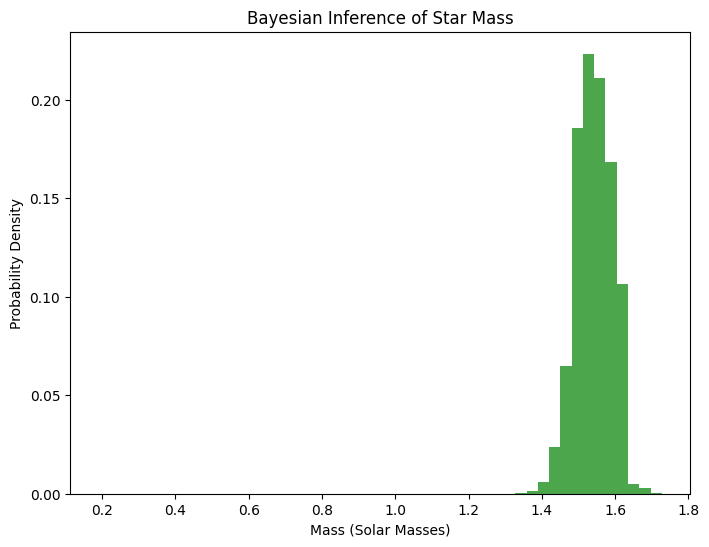

In [13]:
# Example 3: Bayesian Inference - Estimating a Star's Mass
# --------------------------------------------------------

# Prior: Mass follows a normal distribution around 1 solar mass
mass_prior = np.random.normal(1, 0.2, 10000)  # Solar masses

# Likelihood: Follows the mass-luminosity relation L ~ M^3.5
luminosity_observed = 5.0  # Assume observed luminosity is 5 times the Sun's
likelihood = np.exp(-0.5 * ((luminosity_observed - mass_prior**3.5)**2) / 0.5**2)
posterior = likelihood * mass_prior  # Bayesian update
posterior /= np.sum(posterior)  # Normalize

# Plot posterior distribution
plt.figure(figsize=(8,6))
plt.hist(mass_prior, bins=50, weights=posterior, color='green', alpha=0.7)
plt.xlabel("Mass (Solar Masses)")
plt.ylabel("Probability Density")
plt.title("Bayesian Inference of Star Mass")
plt.show()